In [1]:
import pandas as pd
import numpy as np

from scipy.io import arff
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
%matplotlib inline

On cmmence par charger les donner et par les simplifier pour les id 

In [2]:
data_app = arff.loadarff('material/starcraft-a.arff')
df_app = pd.DataFrame(data_app[0])
df_app['user'] = df_app['user'].apply( lambda x : int(str(x).split('/')[6]))
df_app['race'] = df_app['race'].apply( lambda x : str(x).split(':')[1].split('\'')[0]) 
df_app['status'] = df_app['status'].apply( lambda x : str(x).split(':')[1].split('\'')[0]) 
df_app.head()

,race,status,user,s,hotkey40,hotkey30,hotkey32,hotkey42,hotkey20,hotkey10,...,hotkey41,hotkey51,hotkey61,hotkey21,hotkey71,hotkey81,hotkey91,hotkey11,hotkey31,APM
0,Protoss,Win,2341467,65.0,17.0,1.0,86.0,51.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123.536842
1,Protoss,Win,2341467,65.0,11.0,1.0,84.0,48.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,101.118881
2,Protoss,Loss,2341467,70.0,12.0,3.0,78.0,29.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.286885
3,Protoss,Loss,2341467,46.0,16.0,1.0,40.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.346380
4,Protoss,Win,2341467,56.0,5.0,3.0,71.0,32.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,91.040564


In [3]:
NUM_COLORS = df_app.user.unique().__len__()
cm = plt.get_cmap('gist_rainbow')

dict = {}
i = 0
for id in  df_app.user.unique():
    dict[id] = cm(1.*i/NUM_COLORS)
    i += 1
dict

{377576: (0.0, 0.30583972719522567, 1.0, 1.0),
 2341467: (1.0, 0.0, 0.16, 1.0),
 2342120: (0.23317435082140958, 1.0, 0.0, 1.0),
 2342343: (1.0, 0.98251192368839435, 0.0, 1.0),
 2342419: (0.0, 1.0, 0.92768290111743668, 1.0),
 2343067: (0.0, 1.0, 0.54817625975121254, 1.0),
 2343479: (0.0, 1.0, 0.14758591608686492, 1.0),
 2348639: (1.0, 0.60095389507154218, 0.0, 1.0),
 2896854: (0.0, 0.68947144075021338, 1.0, 1.0),
 3074362: (0.48273657289002581, 0.0, 1.0, 1.0),
 3202227: (1.0, 0.21939586645469003, 0.0, 1.0),
 3538115: (0.099104859335038514, 0.0, 1.0, 1.0),
 3973341: (0.86636828644501318, 0.0, 1.0, 1.0),
 4665241: (0.61473237943826176, 1.0, 0.0, 1.0)}

In [4]:
# pd.Series(df_app['APM'].values).index
df_app['color']  = df_app['user'].apply( lambda x: dict[x])


On donne une couleur à chaque joureur dans la bd

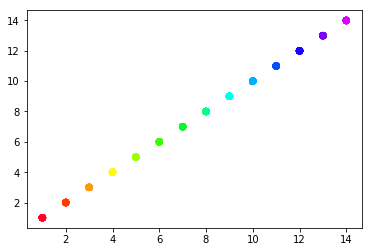

In [5]:
dict_user_place = {}
place = 1
for id in df_app.user.unique():
    dict_user_place[id] = place
    place+=1
size = [40]*len(df_app['user'])
plt.scatter(df_app['user'].apply( lambda x: dict_user_place[x]), df_app['user'].apply( lambda x: dict_user_place[x]), s=size, c=df_app['color'])

In [6]:
df_app.corr()['user']

user             1.000000
s               -0.314502
hotkey40        -0.121102
hotkey30        -0.127121
hotkey32        -0.436941
hotkey42        -0.139547
hotkey20         0.504503
hotkey10        -0.114423
hotkey12         0.010747
Base            -0.169644
hotkey50        -0.127363
hotkey52        -0.064787
hotkey22        -0.086297
SingleMineral    0.491286
hotkey60         0.086206
hotkey70         0.472979
hotkey80         0.502923
hotkey90         0.245275
hotkey00         0.304159
hotkey01              NaN
hotkey62         0.447860
hotkey02         0.264466
hotkey92         0.049563
hotkey82              NaN
hotkey72              NaN
hotkey41        -0.021978
hotkey51              NaN
hotkey61              NaN
hotkey21        -0.031134
hotkey71              NaN
hotkey81              NaN
hotkey91              NaN
hotkey11        -0.021983
hotkey31              NaN
APM              0.290932
Name: user, dtype: float64

In [7]:
serie = pd.Series(df_app.corr()['user'])
imp_attributs = list(serie[abs(serie) > 0.2].index)
imp_attributs.remove('user')
imp_attributs.append('hotkey42')
serie[abs(serie) > 0.2]

user             1.000000
s               -0.314502
hotkey32        -0.436941
hotkey20         0.504503
SingleMineral    0.491286
hotkey70         0.472979
hotkey80         0.502923
hotkey90         0.245275
hotkey00         0.304159
hotkey62         0.447860
hotkey02         0.264466
APM              0.290932
Name: user, dtype: float64

In [8]:
imp_attributs

['s',
 'hotkey32',
 'hotkey20',
 'SingleMineral',
 'hotkey70',
 'hotkey80',
 'hotkey90',
 'hotkey00',
 'hotkey62',
 'hotkey02',
 'APM',
 'hotkey42']

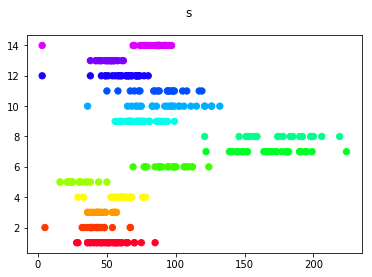

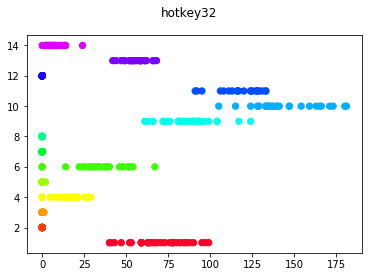

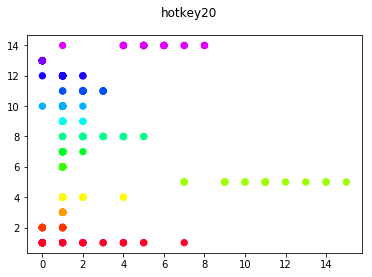

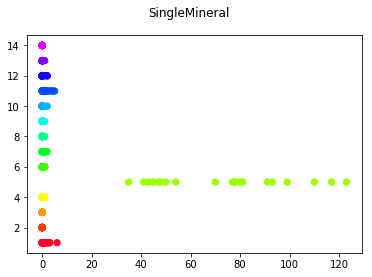

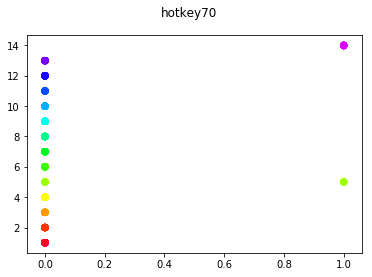

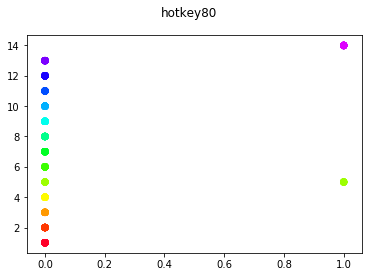

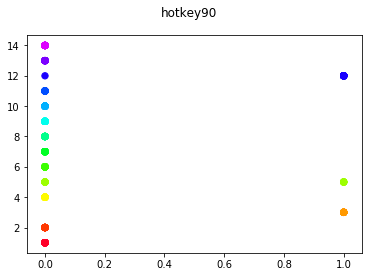

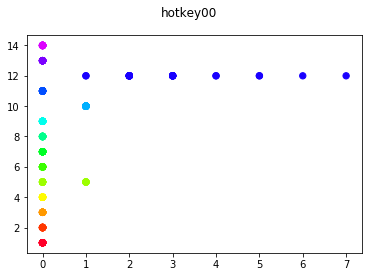

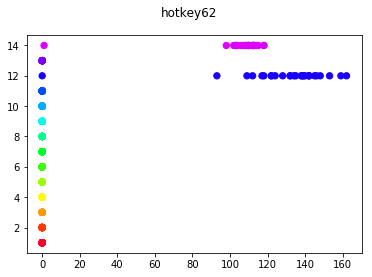

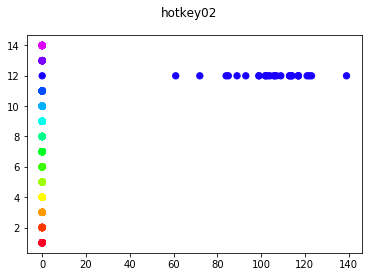

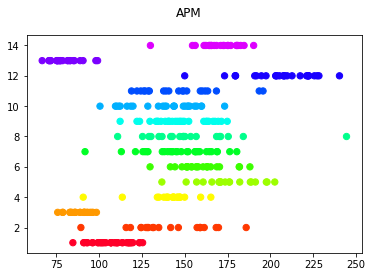

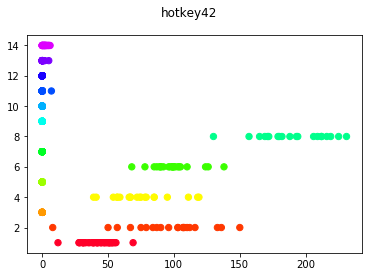

In [9]:

i = 1
for att in imp_attributs:
    plt.figure(i)
    plt.suptitle(att)
    i+=1
    plt.scatter(df_app[att], df_app['user'].apply( lambda x: dict_user_place[x]), s=size, c=df_app['color'])
plt.show()

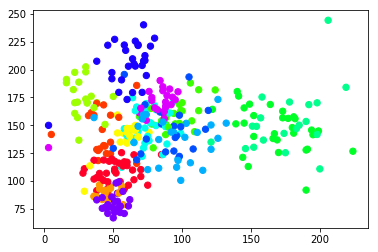

In [10]:
plt.scatter(df_app['s'], df_app['APM'], s=size, c=df_app['color'])

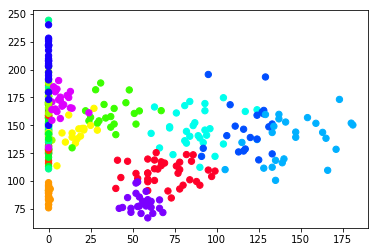

In [11]:
plt.scatter(df_app['hotkey32'], df_app['APM'], s=size, c=df_app['color'])

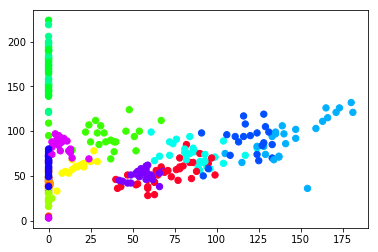

In [12]:
plt.scatter(df_app['hotkey32'], df_app['s'], s=size, c=df_app['color'])

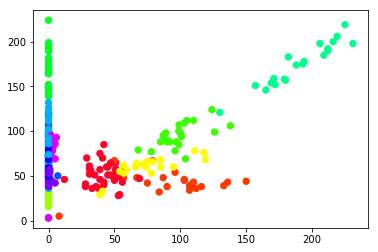

In [13]:
plt.scatter(df_app['hotkey42'], df_app['s'], s=size, c=df_app['color'])

In [14]:
df_app = df_app[df_app.notnull()]

We now split our training set to make test set to evaluate or model

In [15]:
data = df_app.drop('user', axis=1)
imp_data = data[imp_attributs]
imp_data = imp_data.drop(['hotkey70', 'hotkey80', 'hotkey90'], axis=1)
label = df_app['user']
train_data, test_data, train_label, test_label = train_test_split(
    imp_data, label, test_size=0.2, random_state=42)
test_data.head()

,s,hotkey32,hotkey20,SingleMineral,hotkey00,hotkey62,hotkey02,APM,hotkey42
194,132.0,180.0,1.0,0.0,1.0,0.0,0.0,151.986971,0.0
157,61.0,80.0,0.0,1.0,0.0,0.0,0.0,96.266526,31.0
225,66.0,93.0,1.0,0.0,0.0,0.0,0.0,163.118149,0.0
208,87.0,128.0,2.0,1.0,0.0,0.0,0.0,160.261283,0.0
318,71.0,0.0,1.0,0.0,6.0,138.0,113.0,203.786317,0.0


In [16]:
train_data.head()

,s,hotkey32,hotkey20,SingleMineral,hotkey00,hotkey62,hotkey02,APM,hotkey42
66,71.0,99.0,1.0,0.0,0.0,0.0,0.0,122.156863,0.0
229,88.0,8.0,6.0,0.0,0.0,108.0,0.0,167.207547,0.0
7,48.0,0.0,0.0,0.0,0.0,0.0,0.0,124.527163,57.0
140,182.0,0.0,1.0,2.0,0.0,0.0,0.0,155.942721,0.0
323,46.0,58.0,0.0,0.0,0.0,0.0,0.0,78.810409,0.0


In [17]:
pd.Series(imp_data.describe().loc['max'])-pd.Series(imp_data.describe().loc['min'])

s                221.000000
hotkey32         181.000000
hotkey20          15.000000
SingleMineral    123.000000
hotkey00           7.000000
hotkey62         162.000000
hotkey02         139.000000
APM              177.467734
hotkey42         231.000000
dtype: float64

In [18]:
(imp_data.hotkey62.apply(lambda x: str(x))).describe()

count     344
unique     34
top       0.0
freq      294
Name: hotkey62, dtype: object

## Decision tree

In [19]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_data, train_label)
clf.score(test_data,test_label)*100

92.753623188405797

92% de bonne réponses, not bad

In [32]:
tree.export_graphviz(clf,
    out_file='tree.dot') 

## Other data base from star craft all 

In [48]:
import os 

In [49]:
data_dir_path = "./material/starcraft-all"
Starcraft_DF_list  = []
name_file_list = []
for file in os.listdir(data_dir_path):
    data_app = arff.loadarff(data_dir_path+"/"+file)
    Starcraft_DF_list.append(pd.DataFrame(data_app[0]))
    name_file_list.append(str(file))
    

In [50]:
for df_app in Starcraft_DF_list:
    df_app['user'] = df_app['user'].apply( lambda x : int(str(x).split('/')[6]))
    df_app['race'] = df_app['race'].apply( lambda x : str(x).split(':')[1].split('\'')[0]) 
    df_app['status'] = df_app['status'].apply( lambda x : str(x).split(':')[1].split('\'')[0]) 

In [52]:
for df_app in Starcraft_DF_list:
    df_app = df_app[df_app.notnull()]
    
data_label_list = []

for df_app in Starcraft_DF_list: 
    data = df_app.drop('user', axis=1)
    imp_data = data[imp_attributs]
    imp_data = imp_data.drop(['hotkey70', 'hotkey80', 'hotkey90'], axis=1)
    label = df_app['user']
    data_label_list.append((imp_data,label))

score_list = []
for data_label_tuple in data_label_list:
    imp_data = data_label_tuple[0]
    label = data_label_tuple[1]
    train_data, test_data, train_label, test_label = train_test_split(\
        imp_data, label, test_size=0.2, random_state=42)
    clf = tree.DecisionTreeClassifier()
    clf = clf.fit(train_data, train_label)
    score_list.append((float(clf.score(test_data,test_label)*100)))


In [58]:
threshold = 80

print("The most efficient data set")

for x in zip(name_file_list,score_list):
    if x[1] > threshold:
        print(x)
        
print("The less efficient")

for x in zip(name_file_list,score_list):
    if x[1] <= threshold:
        print(x)

The most efficient data set
('t1000_theta15.arff', 86.8421052631579)
('t100_theta10.arff', 82.96703296703298)
('t100_theta15.arff', 87.71929824561403)
('t100_theta20.arff', 91.30434782608695)
('t10_theta15.arff', 80.7017543859649)
('t10_theta20.arff', 88.40579710144928)
('t2000_theta15.arff', 82.45614035087719)
('t200_theta10.arff', 85.16483516483517)
('t200_theta15.arff', 91.22807017543859)
('t200_theta20.arff', 94.20289855072464)
('t20_theta15.arff', 89.47368421052632)
('t20_theta20.arff', 92.7536231884058)
('t3000_theta15.arff', 85.08771929824562)
('t300_theta10.arff', 84.06593406593407)
('t300_theta15.arff', 92.98245614035088)
('t300_theta20.arff', 84.05797101449275)
('t30_theta15.arff', 85.96491228070175)
('t30_theta20.arff', 92.7536231884058)
('t4000_theta15.arff', 81.57894736842105)
('t400_theta15.arff', 82.45614035087719)
('t400_theta20.arff', 91.30434782608695)
('t40_theta15.arff', 83.33333333333334)
('t40_theta20.arff', 86.95652173913044)
('t5000_theta15.arff', 83.33333333333

In [68]:
t_index = []
theta_index = []
for name in name_file_list:
    t_index.append(int(name.split('_')[0][1:]))
    theta_index.append(int(name.split('theta')[1][:len(name.split('theta')[1])-5]))
t_serie = pd.Series(t_index)
theta_serie = pd.Series(theta_index)
score_serie = pd.Series(score_list)

score_t_theta_df = pd.DataFrame({"t": t_serie, "theta": theta_serie, "score": score_serie})

score_t_theta_df.corr()

,score,t,theta
score,1.000000,-0.018447,0.884683
t,-0.018447,1.000000,0.121349
theta,0.884683,0.121349,1.000000


In [91]:
# sort_values(by=column, ascending=False)
score_t_theta_df.drop('t', axis = 1).sort_values(ascending=[False,True], 
                                           by=['theta', 'score']).values

array([[ 76.8115942 ,  20.        ],
       [ 78.26086957,  20.        ],
       [ 78.26086957,  20.        ],
       [ 79.71014493,  20.        ],
       [ 79.71014493,  20.        ],
       [ 82.60869565,  20.        ],
       [ 82.60869565,  20.        ],
       [ 84.05797101,  20.        ],
       [ 86.95652174,  20.        ],
       [ 86.95652174,  20.        ],
       [ 86.95652174,  20.        ],
       [ 86.95652174,  20.        ],
       [ 88.4057971 ,  20.        ],
       [ 88.4057971 ,  20.        ],
       [ 89.85507246,  20.        ],
       [ 89.85507246,  20.        ],
       [ 91.30434783,  20.        ],
       [ 91.30434783,  20.        ],
       [ 92.75362319,  20.        ],
       [ 92.75362319,  20.        ],
       [ 92.75362319,  20.        ],
       [ 92.75362319,  20.        ],
       [ 94.20289855,  20.        ],
       [ 80.70175439,  15.        ],
       [ 81.57894737,  15.        ],
       [ 82.45614035,  15.        ],
       [ 82.45614035,  15.        ],
 

In [93]:
score_t_theta_df.drop('t', axis = 1).groupby('theta').mean()

,score
theta,
0,55.119880
5,61.625709
10,75.752508
15,86.880244
20,86.704474


l'autre var ne marche pas ou suffit rapidement 

## Starcraft B-Data Set 


In [98]:
data_app = arff.loadarff('material/starcraft-b.arff',)
starcraft_b_df = pd.DataFrame(data_app[0])

ParseArffError: Error while parsing header, error was: 'utf-8' codec can't decode bytes in position 4510-4511: invalid continuation byte